In [296]:

import pandas as pd
import os

# Define the path to your dataset folder
data_path = '/Users/suhasbn/Desktop/Preventive maintainance of milling macine /Datasets/EXP_Square/'

# List of raw data files
raw_data_files = [
    'Label_Rawdata_1.csv',
    'Label_Rawdata_2.csv',
    'Label_Rawdata_3.csv',
    'Label_Rawdata_4.csv',
    'Label_Rawdata_5.csv',
    'Label_Rawdata_6.csv',
    'Label_Rawdata_7.csv',
    'Label_Rawdata_8.csv'
]

# Initialize an empty list to store DataFrames
data_frames = []

# Load each dataset and add a 'Layer' column to identify the layer
for i, file_name in enumerate(raw_data_files, start=1):
    file_path = os.path.join(data_path, file_name)
    if os.path.exists(file_path):  # Check if the file exists
        df = pd.read_csv(file_path)
        df['Layer'] = i  # Add a column to indicate the layer number
        data_frames.append(df)
    else:
        print(f"Warning: File {file_name} not found at {file_path}")

# Concatenate all the DataFrames
if data_frames:
    combined_data = pd.concat(data_frames, ignore_index=True)
    print("Combined Data Shape:", combined_data.shape)
    print(combined_data.head())
else:
    print("No data files were loaded. Please check the file paths.")


Combined Data Shape: (7051, 3075)
   Timetag  Segmentation  Rawdata_X_1  Rawdata_X_2  Rawdata_X_3  Rawdata_X_4  \
0        1             0     0.016101     0.011142     0.021075     0.029383   
1        2             0     0.014399     0.009821     0.020487     0.030551   
2        3             0     0.016282     0.011831     0.020851     0.029386   
3        4             0     0.017256     0.013034     0.024048     0.029158   
4        5             0     0.015371     0.012626     0.021698     0.029023   

   Rawdata_X_5  Rawdata_X_6  Rawdata_X_7  Rawdata_X_8  ...  Rawdata_Z_1016  \
0     0.036252     0.035768     0.037452     0.040684  ...       -0.042264   
1     0.039021     0.038625     0.040340     0.040136  ...       -0.040504   
2     0.036948     0.036971     0.038656     0.038920  ...       -0.041289   
3     0.038074     0.035677     0.041879     0.039099  ...       -0.042765   
4     0.036921     0.039193     0.042104     0.040883  ...       -0.042004   

   Rawdata_Z_101

In [297]:
# Check for missing values and data types
print("Checking for Missing Values and Data Types...")
missing_values = combined_data.isnull().sum().sum()
print(f"Missing Values in Combined Data: {missing_values}")
print("\nData Types:\n", combined_data.dtypes)

# Check the distribution of the 'Segmentation' column
if 'Segmentation' in combined_data.columns:
    print("\nSegmentation Distribution:\n", combined_data['Segmentation'].value_counts())
else:
    print("\nError: 'Segmentation' column not found in the dataset.")

# Separate the data based on segmentation
if 'Segmentation' in combined_data.columns:
    dry_run_data = combined_data[combined_data['Segmentation'] == 0]
    machining_data = combined_data[combined_data['Segmentation'] == 1]
    
    # Display the shapes of the two datasets
    print("\nDry Run Data Shape:", dry_run_data.shape)
    print("Machining Data Shape:", machining_data.shape)
    
    # Display a sample of the machining data
    print("\nSample Machining Data:")
    print(machining_data.head())
else:
    dry_run_data = None
    machining_data = None
    print("\nCannot separate data: 'Segmentation' column is missing.")


Checking for Missing Values and Data Types...
Missing Values in Combined Data: 0

Data Types:
 Timetag             int64
Segmentation        int64
Rawdata_X_1       float64
Rawdata_X_2       float64
Rawdata_X_3       float64
                   ...   
Rawdata_Z_1021    float64
Rawdata_Z_1022    float64
Rawdata_Z_1023    float64
Rawdata_Z_1024    float64
Layer               int64
Length: 3075, dtype: object

Segmentation Distribution:
 Segmentation
1    6480
0     571
Name: count, dtype: int64

Dry Run Data Shape: (571, 3075)
Machining Data Shape: (6480, 3075)

Sample Machining Data:
    Timetag  Segmentation  Rawdata_X_1  Rawdata_X_2  Rawdata_X_3  Rawdata_X_4  \
27       28             1    -0.155723    -0.133368    -0.108738    -0.055261   
28       29             1     0.019742    -0.107052     0.019573    -0.033212   
29       30             1    -0.003565     0.006880     0.033285    -0.087710   
30       31             1    -0.145128    -0.171849    -0.154801     0.052919   
31    

In [353]:
import numpy as np
from scipy.stats import skew, kurtosis

# Initialize an empty list to store features for each layer
layer_features = []

# Process each layer separately
for layer in combined_data['Layer'].unique():
    # Filter data for the current layer
    layer_data = combined_data[combined_data['Layer'] == layer]

    # Process only the machining data (Segmentation = 1)
    machining_data = layer_data[layer_data['Segmentation'] == 1]

    # Initialize an empty list to store features for each layer
layer_features = []

# Process each layer separately
for layer in combined_data['Layer'].unique():
    # Filter data for the current layer
    layer_data = combined_data[combined_data['Layer'] == layer]

    # Process only the machining data (Segmentation = 1)
    machining_data = layer_data[layer_data['Segmentation'] == 1]

    # Extract features for each row (time step)
    for index, row in machining_data.iterrows():
        # Extract vibration data for X, Y, Z axes
        x_values = [row[f'Rawdata_X_{i+1}'] for i in range(1024)]
        y_values = [row[f'Rawdata_Y_{i+1}'] for i in range(1024)]
        z_values = [row[f'Rawdata_Z_{i+1}'] for i in range(1024)]

        # Compute statistical features
        features = {
            'Layer': layer,
            'Timestep': index,
            'Segmentation': row['Segmentation'],  # Include the segmentation value
            'Time (seconds)': index * 512,  # Map index to cumulative time
            'X_mean': np.mean(x_values),
            'X_std': np.std(x_values),
            'X_max': np.max(x_values),
            'X_min': np.min(x_values),
            'X_skew': skew(x_values),
            'X_kurtosis': kurtosis(x_values),
            'Y_mean': np.mean(y_values),
            'Y_std': np.std(y_values),
            'Y_max': np.max(y_values),
            'Y_min': np.min(y_values),
            'Y_skew': skew(y_values),
            'Y_kurtosis': kurtosis(y_values),
            'Z_mean': np.mean(z_values),
            'Z_std': np.std(z_values),
            'Z_max': np.max(z_values),
            'Z_min': np.min(z_values),
            'Z_skew': skew(z_values),
            'Z_kurtosis': kurtosis(z_values),
        }
        layer_features.append(features)

# Convert the list of features into a DataFrame
features_df = pd.DataFrame(layer_features)

# Display the updated DataFrame
print("Updated Features DataFrame with Segmentation:")
print(features_df.head())

# Display the final feature set
print("Layer-Wise Features Shape:", features_df.shape)
print(features_df.head())


Updated Features DataFrame with Segmentation:
   Layer  Timestep  Segmentation  Time (seconds)    X_mean     X_std  \
0      1        27           1.0           13824 -0.002776  0.089913   
1      1        28           1.0           14336 -0.002742  0.080355   
2      1        29           1.0           14848 -0.002612  0.078706   
3      1        30           1.0           15360 -0.002542  0.079529   
4      1        31           1.0           15872 -0.002365  0.080243   

      X_max     X_min    X_skew  X_kurtosis  ...     Y_max     Y_min  \
0  0.317422 -0.299160  0.343669   -0.007183  ...  0.281118 -0.277005   
1  0.285563 -0.217593  0.290053    0.396480  ...  0.299365 -0.297382   
2  0.319050 -0.222405  0.282581    0.790271  ...  0.294581 -0.305664   
3  0.317752 -0.249874  0.205622    0.507145  ...  0.292854 -0.343996   
4  0.337492 -0.236458  0.276096    0.652794  ...  0.335361 -0.305912   

     Y_skew  Y_kurtosis    Z_mean     Z_std     Z_max     Z_min    Z_skew  \
0  0.086716

In [354]:
import pandas as pd
import os

# Define the path to your dataset folder
data_path = '/Users/suhasbn/Desktop/Preventive maintainance of milling macine /Datasets/EXP_Square/'

# Load the tool material properties file
tool_material_properties = pd.read_excel(os.path.join(data_path, 'Tool material properties.xlsx'))

# Display the data to verify its structure
print("Tool Material Properties:")
print(tool_material_properties)

# Extract and process the material properties for use in calculations
material_properties = {}
for index, row in tool_material_properties.iterrows():
    property_name = row['Property'].replace(" ", "_").lower()  # Normalize property names
    material_properties[property_name] = (row['Minimum Value (S.I.)'] + row['Maximum Value (S.I.)']) / 2

# Display the processed material properties
print("\nProcessed Material Properties for Use in Calculations:")
print(material_properties)

# Example Usage in a Calculation (Can be extended for specific features)
# Assume we calculate wear resistance as an example:
if 'compressive_strength' in material_properties and 'thermal_conductivity' in material_properties and 'hardness' in material_properties:
    compressive_strength = material_properties['compressive_strength']
    thermal_conductivity = material_properties['thermal_conductivity']
    hardness = material_properties['hardness']
    wear_resistance_index = (compressive_strength * thermal_conductivity) / hardness
    print(f"Wear Resistance Index: {wear_resistance_index}")
else:
    print("Missing required material properties for wear resistance calculation.")


Tool Material Properties:
                       Property  Minimum Value (S.I.)  Maximum Value (S.I.)  \
0       Atomic Volume (average)               0.00620                0.0064   
1                       Density              15.25000               15.8800   
2                Energy Content             150.00000              200.0000   
3                  Bulk Modulus             350.00000              400.0000   
4          Compressive Strength            3347.00000             6833.0000   
5                     Ductility               0.00500                0.0074   
6                 Elastic Limit             335.00000              530.0000   
7               Endurance Limit             285.00000              420.0000   
8            Fracture Toughness               2.00000                3.8000   
9                      Hardness           17000.00000            36000.0000   
10             Loss Coefficient               0.00005                0.0001   
11           Modulus of Ru

In [355]:
# Ensure material properties are processed
if not material_properties:
    raise ValueError("Material properties must be loaded and processed before computing derived features.")

# Initialize derived features
derived_features = {}

# Calculate only relevant derived metrics
if 'compressive_strength' in material_properties and 'thermal_conductivity' in material_properties and 'hardness' in material_properties:
    compressive_strength = material_properties['compressive_strength']
    thermal_conductivity = material_properties['thermal_conductivity']
    hardness = material_properties['hardness']
    
    # Wear Resistance Index
    derived_features['wear_resistance_index'] = (compressive_strength * thermal_conductivity) / hardness

if 'energy_content' in material_properties and 'density' in material_properties:
    energy_content = material_properties['energy_content']
    density = material_properties['density']
    
    # Energy Absorption Coefficient
    derived_features['energy_absorption_coefficient'] = energy_content / density

# Example: Compute stress factor using vibration energy (from features_df)
if 'compressive_strength' in material_properties and 'machining_Rawdata_X_1_total_energy' in features_df.columns:
    total_vibration_energy = features_df['machining_Rawdata_X_1_total_energy'].iloc[0]  # Example column
    derived_features['stress_factor'] = compressive_strength * total_vibration_energy

# Add derived features to the dataset
for feature_name, value in derived_features.items():
    features_df[feature_name] = value

# Display the updated DataFrame
print("Feature Set with Relevant Derived Features Shape:", features_df.shape)
print(features_df.head())


Feature Set with Relevant Derived Features Shape: (6480, 24)
   Layer  Timestep  Segmentation  Time (seconds)    X_mean     X_std  \
0      1        27           1.0           13824 -0.002776  0.089913   
1      1        28           1.0           14336 -0.002742  0.080355   
2      1        29           1.0           14848 -0.002612  0.078706   
3      1        30           1.0           15360 -0.002542  0.079529   
4      1        31           1.0           15872 -0.002365  0.080243   

      X_max     X_min    X_skew  X_kurtosis  ...    Y_skew  Y_kurtosis  \
0  0.317422 -0.299160  0.343669   -0.007183  ...  0.086716   -0.174267   
1  0.285563 -0.217593  0.290053    0.396480  ...  0.166653   -0.048035   
2  0.319050 -0.222405  0.282581    0.790271  ...  0.224633    0.160508   
3  0.317752 -0.249874  0.205622    0.507145  ...  0.064604    0.082847   
4  0.337492 -0.236458  0.276096    0.652794  ...  0.168507    0.286946   

     Z_mean     Z_std     Z_max     Z_min    Z_skew  Z_kurtos

In [356]:
# Check all columns related to vibration data
vibration_columns = [col for col in combined_data.columns if 'Rawdata' in col]
print("Number of Vibration Data Columns:", len(vibration_columns))
print("Sample Columns:", vibration_columns[:10])

# Check if these columns have valid data
print("Summary of Vibration Data Columns:")
print(combined_data[vibration_columns].describe())


Number of Vibration Data Columns: 3072
Sample Columns: ['Rawdata_X_1', 'Rawdata_X_2', 'Rawdata_X_3', 'Rawdata_X_4', 'Rawdata_X_5', 'Rawdata_X_6', 'Rawdata_X_7', 'Rawdata_X_8', 'Rawdata_X_9', 'Rawdata_X_10']
Summary of Vibration Data Columns:
       Rawdata_X_1  Rawdata_X_2  Rawdata_X_3  Rawdata_X_4  Rawdata_X_5  \
count  7051.000000  7051.000000  7051.000000  7051.000000  7051.000000   
mean      0.001327     0.001981    -0.000407    -0.000356     0.000734   
std       0.107281     0.105203     0.109550     0.112871     0.110485   
min      -0.413198    -0.403909    -0.405145    -0.390119    -0.471859   
25%      -0.064607    -0.060146    -0.065811    -0.065446    -0.063010   
50%       0.003090     0.001333     0.001016     0.000447     0.002798   
75%       0.067494     0.063516     0.065837     0.064480     0.067547   
max       0.589300     0.458660     0.407373     0.467758     0.390562   

       Rawdata_X_6  Rawdata_X_7  Rawdata_X_8  Rawdata_X_9  Rawdata_X_10  ...  \
count  7051

In [357]:
# Check for non-zero data in vibration columns
non_zero_summary = combined_data[vibration_columns].any(axis=1).sum()
print(f"Number of rows with non-zero vibration data: {non_zero_summary}")


Number of rows with non-zero vibration data: 7051


In [358]:
# Filter machining data (Segmentation = 1)
machining_data = combined_data[combined_data['Segmentation'] == 1]

# Check for all-zero rows in vibration data
vibration_columns = [col for col in machining_data.columns if 'Rawdata' in col]
all_zero_rows = (machining_data[vibration_columns].sum(axis=1) == 0).sum()

print(f"Number of rows with all-zero vibration data in machining data: {all_zero_rows}")
print("Sample vibration data from machining rows:")
print(machining_data[vibration_columns].head())


Number of rows with all-zero vibration data in machining data: 0
Sample vibration data from machining rows:
    Rawdata_X_1  Rawdata_X_2  Rawdata_X_3  Rawdata_X_4  Rawdata_X_5  \
27    -0.155723    -0.133368    -0.108738    -0.055261     0.000078   
28     0.019742    -0.107052     0.019573    -0.033212    -0.035333   
29    -0.003565     0.006880     0.033285    -0.087710     0.014821   
30    -0.145128    -0.171849    -0.154801     0.052919     0.020366   
31     0.014784    -0.049762    -0.008280    -0.139676    -0.041099   

    Rawdata_X_6  Rawdata_X_7  Rawdata_X_8  Rawdata_X_9  Rawdata_X_10  ...  \
27     0.064697     0.158506     0.031130    -0.060546     -0.063280  ...   
28    -0.115384    -0.086472     0.121563     0.026212      0.108715  ...   
29    -0.073892    -0.056083    -0.021876    -0.159032      0.055639  ...   
30    -0.065436    -0.061861     0.051486     0.003926     -0.069477  ...   
31    -0.140746    -0.049683     0.159542     0.038839      0.022744  ...   

  

In [359]:
import numpy as np

# Define the noise level as a percentage of the standard deviation
noise_level = 0.01  # 1% of the standard deviation

# List of vibration features
vibration_features = [
    'X_mean', 'X_std', 'X_max', 'X_min', 'X_skew', 'X_kurtosis',
    'Y_mean', 'Y_std', 'Y_max', 'Y_min', 'Y_skew', 'Y_kurtosis',
    'Z_mean', 'Z_std', 'Z_max', 'Z_min', 'Z_skew', 'Z_kurtosis'
]

# Add Gaussian noise to each vibration feature
for feature in vibration_features:
    if feature in features_df.columns:
        std_dev = features_df[feature].std()
        noise = np.random.normal(0, noise_level * std_dev, size=features_df.shape[0])
        features_df[feature] += noise

# Display updated DataFrame to verify noise addition
print("Features DataFrame after adding noise to vibration features:")
print(features_df[vibration_features].head())

Features DataFrame after adding noise to vibration features:
     X_mean     X_std     X_max     X_min    X_skew  X_kurtosis    Y_mean  \
0 -0.002779  0.089995  0.317577 -0.299297  0.343533   -0.006110 -0.000917   
1 -0.002743  0.080378  0.285173 -0.217474  0.289729    0.389943 -0.000857   
2 -0.002607  0.078705  0.319082 -0.222371  0.280560    0.790336 -0.001059   
3 -0.002544  0.079376  0.317926 -0.249928  0.206396    0.511291 -0.000681   
4 -0.002358  0.080388  0.337752 -0.236733  0.278087    0.654008 -0.000940   

      Y_std     Y_max     Y_min    Y_skew  Y_kurtosis    Z_mean     Z_std  \
0  0.094165  0.281060 -0.276652  0.085591   -0.179077 -0.000026  0.079262   
1  0.096728  0.298852 -0.296870  0.167675   -0.046047 -0.000304  0.074781   
2  0.091728  0.294588 -0.305729  0.221962    0.159855 -0.000617  0.073744   
3  0.095200  0.292746 -0.342808  0.066662    0.089082 -0.000521  0.073354   
4  0.093449  0.334553 -0.306807  0.168682    0.286316 -0.000260  0.077031   

      Z_max  

In [360]:
print(features_df.head())

   Layer  Timestep  Segmentation  Time (seconds)    X_mean     X_std  \
0      1        27           1.0           13824 -0.002779  0.089995   
1      1        28           1.0           14336 -0.002743  0.080378   
2      1        29           1.0           14848 -0.002607  0.078705   
3      1        30           1.0           15360 -0.002544  0.079376   
4      1        31           1.0           15872 -0.002358  0.080388   

      X_max     X_min    X_skew  X_kurtosis  ...    Y_skew  Y_kurtosis  \
0  0.317577 -0.299297  0.343533   -0.006110  ...  0.085591   -0.179077   
1  0.285173 -0.217474  0.289729    0.389943  ...  0.167675   -0.046047   
2  0.319082 -0.222371  0.280560    0.790336  ...  0.221962    0.159855   
3  0.317926 -0.249928  0.206396    0.511291  ...  0.066662    0.089082   
4  0.337752 -0.236733  0.278087    0.654008  ...  0.168682    0.286316   

     Z_mean     Z_std     Z_max     Z_min    Z_skew  Z_kurtosis  \
0 -0.000026  0.079262  0.238735 -0.252171 -0.149292   -

In [361]:
# Define the time interval per timestep
time_interval = 0.5  # seconds

# Initialize cumulative time for each layer
features_df['Time (seconds)'] = features_df.index * time_interval

# Display the updated features_df
print("Updated Features DataFrame with Time:")
print(features_df[['Layer', 'Timestep', 'Time (seconds)']].head())


Updated Features DataFrame with Time:
   Layer  Timestep  Time (seconds)
0      1        27             0.0
1      1        28             0.5
2      1        29             1.0
3      1        30             1.5
4      1        31             2.0


In [362]:
# Feed rate in mm/min
feed_rate = 320  # mm/min

# Group data by layer and calculate machining time for each layer
layer_times = features_df.groupby('Layer')['Time (seconds)'].max() - features_df.groupby('Layer')['Time (seconds)'].min()

# Convert time to seconds per layer and calculate tool path
feed_rate_per_second = feed_rate / 60  # Convert feed rate to mm/sec
tool_path_per_layer = (feed_rate_per_second * layer_times).to_dict()

# Display the recalculated tool path for each layer
print("Recalculated Tool Path per Layer (mm):")
for layer, tool_path in tool_path_per_layer.items():
    print(f"Layer {layer}: Tool Path = {tool_path:.2f} mm")


Recalculated Tool Path per Layer (mm):
Layer 1: Tool Path = 2128.00 mm
Layer 2: Tool Path = 2141.33 mm
Layer 3: Tool Path = 2144.00 mm
Layer 4: Tool Path = 2160.00 mm
Layer 5: Tool Path = 2146.67 mm
Layer 6: Tool Path = 2165.33 mm
Layer 7: Tool Path = 2181.33 mm
Layer 8: Tool Path = 2192.00 mm


In [368]:
# Define constants for wear calculation
empirical_constant = 1e-4  # Adjust based on literature
hardness = material_properties.get('hardness', 1500)  # MPa
cutting_speed = feed_rate / 1000  # Convert mm/min to m/s
time_interval = 0.5  # seconds

# Ensure Segmentation column exists
if 'Segmentation' not in features_df.columns:
    raise ValueError("'Segmentation' column is missing. Ensure segmentation is properly integrated.")

# Filter machining rows
machining_rows = features_df['Segmentation'] == 1
machining_data = features_df[machining_rows].copy()

# Calculate time progression (relative to each layer)
machining_data['Time Progression'] = machining_data.groupby('Layer')['Timestep'].rank()

# Calculate wear rate with dynamic progression
machining_data['Wear Rate'] = (
    empirical_constant 
    * (cutting_speed / hardness) 
    * machining_data['Time Progression']  # Dynamic progression factor
)

# Calculate wear volume for each timestep
machining_data['Wear Volume'] = machining_data['Wear Rate'] * time_interval

# Calculate cumulative wear volume
machining_data['Cumulative Wear Volume'] = machining_data.groupby('Layer')['Wear Volume'].cumsum()

# Drop existing wear-related columns in the original DataFrame
features_df.drop(columns=['Wear Rate', 'Wear Volume', 'Cumulative Wear Volume'], inplace=True, errors='ignore')

# Merge updated machining data back into the main DataFrame
features_df = features_df.merge(
    machining_data[['Layer', 'Timestep', 'Wear Rate', 'Wear Volume', 'Cumulative Wear Volume']],
    on=['Layer', 'Timestep'],
    how='left'
)

# Set wear values to 0 for non-machining rows
features_df['Wear Rate'].fillna(0, inplace=True)
features_df['Wear Volume'].fillna(0, inplace=True)
features_df['Cumulative Wear Volume'].fillna(method='ffill', inplace=True)

# Display updated DataFrame
print("Updated Features DataFrame with Dynamic Wear Rate:")
print(features_df[['Layer', 'Timestep', 'Segmentation', 'Wear Rate', 'Wear Volume', 'Cumulative Wear Volume']].head(20))


Updated Features DataFrame with Dynamic Wear Rate:
    Layer  Timestep  Segmentation     Wear Rate   Wear Volume  \
0       1        27           1.0  1.207547e-09  6.037736e-10   
1       1        28           1.0  2.415094e-09  1.207547e-09   
2       1        29           1.0  3.622642e-09  1.811321e-09   
3       1        30           1.0  4.830189e-09  2.415094e-09   
4       1        31           1.0  6.037736e-09  3.018868e-09   
5       1        32           1.0  7.245283e-09  3.622642e-09   
6       1        33           1.0  8.452830e-09  4.226415e-09   
7       1        34           1.0  9.660377e-09  4.830189e-09   
8       1        35           1.0  1.086792e-08  5.433962e-09   
9       1        36           1.0  1.207547e-08  6.037736e-09   
10      1        37           1.0  1.328302e-08  6.641509e-09   
11      1        38           1.0  1.449057e-08  7.245283e-09   
12      1        39           1.0  1.569811e-08  7.849057e-09   
13      1        40           1.0  1.69

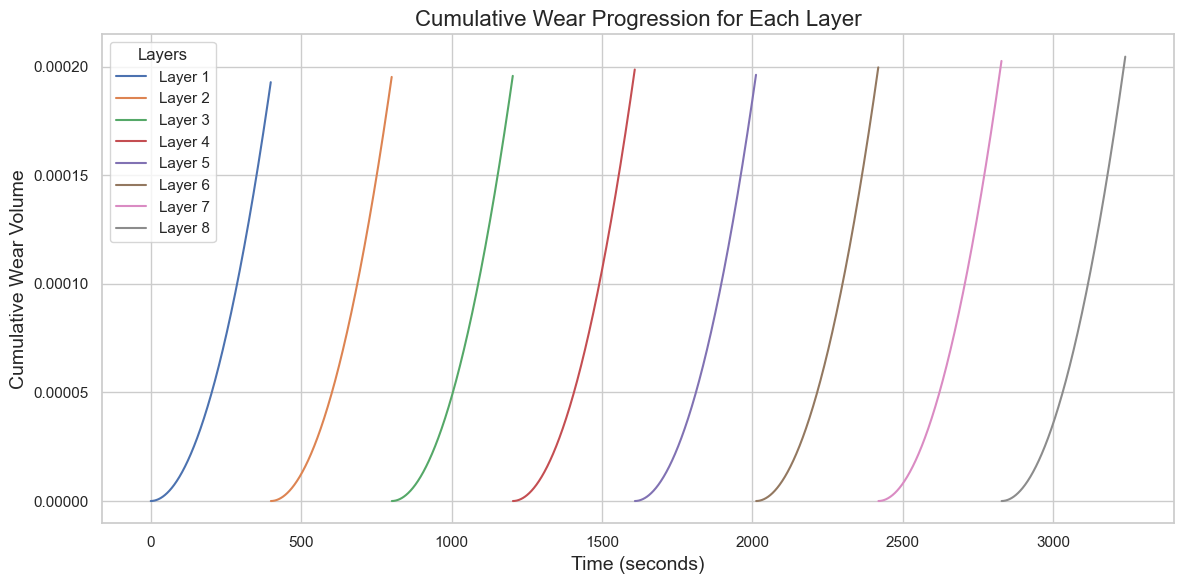

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot cumulative wear volume for each layer
plt.figure(figsize=(12, 6))
for layer in features_df['Layer'].unique():
    layer_data = features_df[features_df['Layer'] == layer]
    plt.plot(
        layer_data['Time (seconds)'],
        layer_data['Cumulative Wear Volume'],
        label=f"Layer {layer}"
    )

# Customize the plot
plt.title("Cumulative Wear Progression for Each Layer", fontsize=16)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Cumulative Wear Volume", fontsize=14)
plt.legend(title="Layers")
plt.tight_layout()

# Show the plot
plt.show()


In [370]:
# Ensure 'Wear Rate' column exists
if 'Wear Rate' not in features_df.columns:
    raise ValueError("The 'Wear Rate' column is missing. Please calculate 'Wear Rate' first.")

# Define the time interval (in seconds) for each timestep
time_interval = 0.5  # seconds

# Calculate Wear Volume for each timestep
features_df['Wear Volume'] = features_df['Wear Rate'] * time_interval

# Handle cases where Wear Volume might be NaN due to missing Wear Rate
features_df['Wear Volume'] = features_df['Wear Volume'].fillna(0)

# Calculate Cumulative Wear Volume for each layer, ensuring continuity across layers
features_df['Cumulative Wear Volume'] = features_df.groupby('Layer')['Wear Volume'].cumsum()

# Optional: Reset cumulative wear for Segmentation = 0 rows (non-machining segments)
if 'Segmentation' in features_df.columns:
    # Reset Wear Volume to 0 for Segmentation = 0
    features_df.loc[features_df['Segmentation'] == 0, 'Wear Volume'] = 0
    
    # Recalculate Cumulative Wear Volume after resetting
    features_df['Cumulative Wear Volume'] = features_df.groupby('Layer')['Wear Volume'].cumsum()

# Display Updated DataFrame with calculated values
print("Updated Features DataFrame with Wear Volume and Cumulative Wear Volume:")
print(features_df[['Layer', 'Timestep', 'Wear Rate', 'Wear Volume', 'Cumulative Wear Volume']].head(20))


Updated Features DataFrame with Wear Volume and Cumulative Wear Volume:
    Layer  Timestep     Wear Rate   Wear Volume  Cumulative Wear Volume
0       1        27  1.207547e-09  6.037736e-10            6.037736e-10
1       1        28  2.415094e-09  1.207547e-09            1.811321e-09
2       1        29  3.622642e-09  1.811321e-09            3.622642e-09
3       1        30  4.830189e-09  2.415094e-09            6.037736e-09
4       1        31  6.037736e-09  3.018868e-09            9.056604e-09
5       1        32  7.245283e-09  3.622642e-09            1.267925e-08
6       1        33  8.452830e-09  4.226415e-09            1.690566e-08
7       1        34  9.660377e-09  4.830189e-09            2.173585e-08
8       1        35  1.086792e-08  5.433962e-09            2.716981e-08
9       1        36  1.207547e-08  6.037736e-09            3.320755e-08
10      1        37  1.328302e-08  6.641509e-09            3.984906e-08
11      1        38  1.449057e-08  7.245283e-09            4.709

In [371]:
# Ensure 'Wear Volume' and 'Wear Rate' columns exist
if 'Wear Volume' not in features_df.columns or 'Wear Rate' not in features_df.columns:
    raise ValueError("Ensure 'Wear Volume' and 'Wear Rate' are calculated before computing RUL.")

# Define the wear threshold (adjust this based on standards or literature)
wear_threshold = 1e-4  # threshold in cubic units

# Calculate RUL (Remaining Useful Life)
features_df['RUL (seconds)'] = (wear_threshold - features_df['Wear Volume']) / features_df['Wear Rate']

# Handle infinite, NaN, and negative values for RUL
features_df['RUL (seconds)'] = features_df['RUL (seconds)'].replace([float('inf'), -float('inf')], 0)
features_df['RUL (seconds)'] = features_df['RUL (seconds)'].fillna(0)  # Replace NaN with 0
features_df['RUL (seconds)'] = features_df['RUL (seconds)'].clip(lower=0)  # Ensure RUL is non-negative

# Optional: Reset RUL for Segmentation = 0 rows (non-machining segments)
if 'Segmentation' in features_df.columns:
    features_df.loc[features_df['Segmentation'] == 0, 'RUL (seconds)'] = 0

# Display Updated DataFrame with RUL
print("Updated Features DataFrame with RUL:")
print(features_df[['Layer', 'Timestep', 'Wear Rate', 'Wear Volume', 'Cumulative Wear Volume', 'RUL (seconds)']].head(20))


Updated Features DataFrame with RUL:
    Layer  Timestep     Wear Rate   Wear Volume  Cumulative Wear Volume  \
0       1        27  1.207547e-09  6.037736e-10            6.037736e-10   
1       1        28  2.415094e-09  1.207547e-09            1.811321e-09   
2       1        29  3.622642e-09  1.811321e-09            3.622642e-09   
3       1        30  4.830189e-09  2.415094e-09            6.037736e-09   
4       1        31  6.037736e-09  3.018868e-09            9.056604e-09   
5       1        32  7.245283e-09  3.622642e-09            1.267925e-08   
6       1        33  8.452830e-09  4.226415e-09            1.690566e-08   
7       1        34  9.660377e-09  4.830189e-09            2.173585e-08   
8       1        35  1.086792e-08  5.433962e-09            2.716981e-08   
9       1        36  1.207547e-08  6.037736e-09            3.320755e-08   
10      1        37  1.328302e-08  6.641509e-09            3.984906e-08   
11      1        38  1.449057e-08  7.245283e-09            4.70

In [372]:
# Ensure 'Wear Volume' and 'Wear Rate' columns exist
if 'Wear Volume' not in features_df.columns or 'Wear Rate' not in features_df.columns:
    raise ValueError("Ensure 'Wear Volume' and 'Wear Rate' are calculated before computing RUL.")

# Define the wear threshold (adjust based on standards or literature)
wear_threshold = 1e-2  # Wear threshold in cubic units

# Calculate RUL (Remaining Useful Life)
features_df['RUL (seconds)'] = (
    wear_threshold / features_df['Wear Volume']
)

# Handle infinite, NaN, and negative values for RUL
features_df['RUL (seconds)'] = features_df['RUL (seconds)'].replace([float('inf'), -float('inf')], 0)
features_df['RUL (seconds)'] = features_df['RUL (seconds)'].fillna(0)  # Replace NaN with 0
features_df['RUL (seconds)'] = features_df['RUL (seconds)'].clip(lower=0)  # Ensure RUL is non-negative

# Optional: Reset RUL for Segmentation = 0 rows (non-machining segments)
if 'Segmentation' in features_df.columns:
    features_df.loc[features_df['Segmentation'] == 0, 'RUL (seconds)'] = 0

# Convert RUL to minutes for convenience
features_df['RUL (machining minutes)'] = features_df['RUL (seconds)'] / 60

# Display Updated DataFrame with RUL
print("Updated Features DataFrame with RUL:")
print(features_df[['Layer', 'Timestep', 'Wear Rate', 'Wear Volume', 'RUL (seconds)', 'RUL (machining minutes)']].head(20))

# Optional: Visualize RUL
layer_end_rul = features_df.groupby('Layer').last()[['RUL (seconds)', 'RUL (machining minutes)']]
print("\nRemaining Useful Life (RUL) at the End of Each Layer (in seconds and minutes):")
print(layer_end_rul)


Updated Features DataFrame with RUL:
    Layer  Timestep     Wear Rate   Wear Volume  RUL (seconds)  \
0       1        27  1.207547e-09  6.037736e-10   1.656250e+07   
1       1        28  2.415094e-09  1.207547e-09   8.281250e+06   
2       1        29  3.622642e-09  1.811321e-09   5.520833e+06   
3       1        30  4.830189e-09  2.415094e-09   4.140625e+06   
4       1        31  6.037736e-09  3.018868e-09   3.312500e+06   
5       1        32  7.245283e-09  3.622642e-09   2.760417e+06   
6       1        33  8.452830e-09  4.226415e-09   2.366071e+06   
7       1        34  9.660377e-09  4.830189e-09   2.070312e+06   
8       1        35  1.086792e-08  5.433962e-09   1.840278e+06   
9       1        36  1.207547e-08  6.037736e-09   1.656250e+06   
10      1        37  1.328302e-08  6.641509e-09   1.505682e+06   
11      1        38  1.449057e-08  7.245283e-09   1.380208e+06   
12      1        39  1.569811e-08  7.849057e-09   1.274038e+06   
13      1        40  1.690566e-08  8.45

Remaining Useful Life (RUL) at the End of Each Layer (in seconds and minutes):
       RUL (seconds)  RUL (machining minutes)
Layer                                        
1       20729.036295               345.483938
2       20600.124378               343.335406
3       20574.534161               342.908903
4       20422.318126               340.371969
5       20549.007444               342.483457
6       20372.078721               339.534645
7       20222.832723               337.047212
8       20124.544350               335.409072


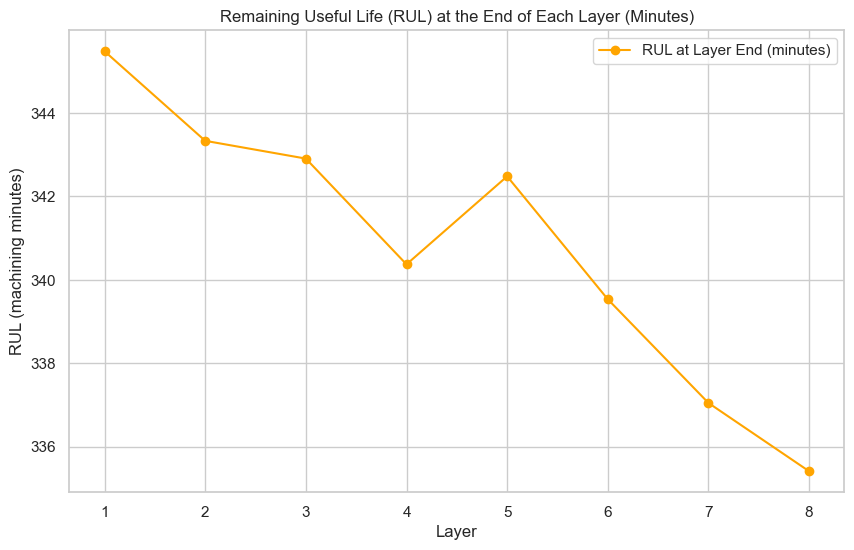

In [373]:
# Ensure 'RUL (seconds)' column exists
if 'RUL (seconds)' not in features_df.columns:
    raise ValueError("RUL (seconds) column is missing. Ensure RUL is calculated before converting to minutes.")

# Convert RUL from seconds to minutes
features_df['RUL (machining minutes)'] = features_df['RUL (seconds)'] / 60

# Check RUL in minutes at the end of each layer
layer_end_rul = features_df.groupby('Layer').last()[['RUL (seconds)', 'RUL (machining minutes)']]

# Display the updated RUL values
print("Remaining Useful Life (RUL) at the End of Each Layer (in seconds and minutes):")
print(layer_end_rul)

# Optional: Visualize RUL in minutes at the end of each layer
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(layer_end_rul.index, layer_end_rul['RUL (machining minutes)'], marker='o', label='RUL at Layer End (minutes)', color='orange')
plt.title("Remaining Useful Life (RUL) at the End of Each Layer (Minutes)")
plt.xlabel("Layer")
plt.ylabel("RUL (machining minutes)")
plt.grid(True)
plt.legend()
plt.show()


In [374]:
from sklearn.model_selection import train_test_split

# Select relevant features (drop unnecessary columns like Layer and Timestep)
target_column = 'RUL (seconds)'
exclude_columns = ['Layer', 'Timestep', 'RUL (minutes)']  # Exclude non-feature columns
features = features_df.drop(columns=exclude_columns + [target_column], errors='ignore')
target = features_df[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display shapes of the split datasets
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Confirm if any features are missing
print("Selected Features for Training:")
print(features.columns)


Training Set Shape: (5184, 26)
Test Set Shape: (1296, 26)
Selected Features for Training:
Index(['Segmentation', 'Time (seconds)', 'X_mean', 'X_std', 'X_max', 'X_min',
       'X_skew', 'X_kurtosis', 'Y_mean', 'Y_std', 'Y_max', 'Y_min', 'Y_skew',
       'Y_kurtosis', 'Z_mean', 'Z_std', 'Z_max', 'Z_min', 'Z_skew',
       'Z_kurtosis', 'wear_resistance_index', 'energy_absorption_coefficient',
       'RUL (machining minutes)', 'Wear Rate', 'Wear Volume',
       'Cumulative Wear Volume'],
      dtype='object')


In [289]:
# Check if the first value in the 'RUL' column is infinite
if features_df['RUL'].iloc[0] == float('inf'):
    # Replace the first infinite value with the maximum finite value in the column
    max_rul_value = features_df['RUL'][features_df['RUL'] != float('inf')].max()
    features_df['RUL'].iloc[0] = max_rul_value

# Display updated DataFrame
print("Updated Features DataFrame with 'inf' replaced at the start of 'RUL':")
print(features_df[['Layer', 'Timestep', 'RUL']].head())


Updated Features DataFrame with 'inf' replaced at the start of 'RUL':
   Layer  Timestep           RUL
0      1        27  4.303941e+07
1      1        28  2.981250e+10
2      1        29  1.490625e+10
3      1        30  9.937500e+09
4      1        31  7.453125e+09


In [290]:
import numpy as np

# Define the noise level as a percentage of the standard deviation
noise_level = 0.05  # 5% of the standard deviation

# List of vibration features
vibration_features = [
    'X_mean', 'X_std', 'X_max', 'X_min', 'X_skew', 'X_kurtosis',
    'Y_mean', 'Y_std', 'Y_max', 'Y_min', 'Y_skew', 'Y_kurtosis',
    'Z_mean', 'Z_std', 'Z_max', 'Z_min', 'Z_skew', 'Z_kurtosis'
]

# Add Gaussian noise to each vibration feature
for feature in vibration_features:
    if feature in features_df.columns:
        std_dev = features_df[feature].std()
        noise = np.random.normal(0, noise_level * std_dev, size=features_df.shape[0])
        features_df[feature] += noise

# Display updated DataFrame to verify noise addition
print("Features DataFrame after adding noise to vibration features:")
print(features_df[vibration_features].head())


Features DataFrame after adding noise to vibration features:
     X_mean     X_std     X_max     X_min    X_skew  X_kurtosis    Y_mean  \
0 -0.002899  0.090228  0.313897 -0.299919  0.347093    0.068179 -0.000996   
1 -0.002718  0.082134  0.289620 -0.208037  0.327317    0.403898 -0.000855   
2 -0.002537  0.080122  0.314087 -0.218354  0.265449    0.791380 -0.001035   
3 -0.002410  0.080052  0.308007 -0.251320  0.215937    0.513022 -0.000702   
4 -0.002247  0.077677  0.327638 -0.238820  0.260077    0.701445 -0.000885   

      Y_std     Y_max     Y_min    Y_skew  Y_kurtosis    Z_mean     Z_std  \
0  0.094577  0.276648 -0.276258  0.092060   -0.188258 -0.000011  0.079522   
1  0.094115  0.298977 -0.309575  0.161404   -0.103701 -0.000272  0.076011   
2  0.093211  0.287653 -0.302207  0.209848    0.135512 -0.000589  0.074284   
3  0.096010  0.298802 -0.330370  0.040317    0.077212 -0.000487  0.073569   
4  0.093391  0.332952 -0.313253  0.164211    0.305443 -0.000197  0.078747   

      Z_max  

In [291]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = features_df.drop(columns=['RUL'])  # Exclude RUL as it is the target
y = features_df['RUL']  # Define RUL as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (5184, 73)
Test Set Shape: (1296, 73)


In [377]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 2333968152.2598
Mean Absolute Error (MAE): 5401.2897
R² Score: 0.9964


Model Evaluation Metrics:
Mean Absolute Error (MAE): 5401.2897
Mean Squared Error (MSE): 2333968152.2598
R² Score: 0.9964


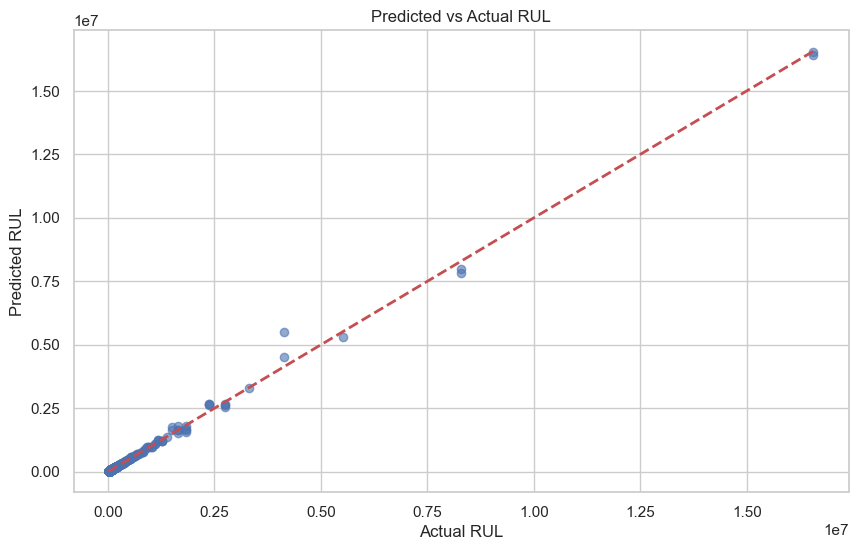

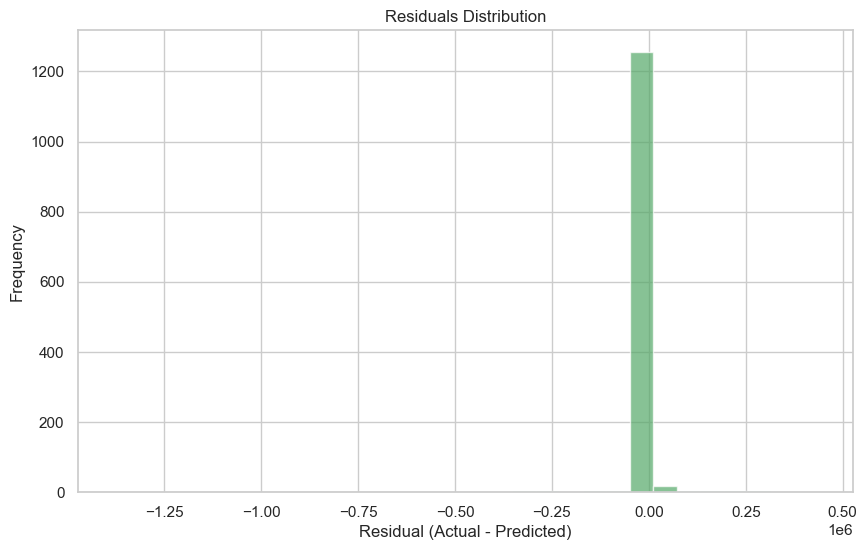

In [378]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict RUL on test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot Predicted vs Actual RUL
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Predicted vs Actual RUL")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.grid(True)
plt.show()

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='g')
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [379]:
# Drop columns with no observed values
useless_columns = ['glass_temperature', 'minimum_service_temperature', 'breakdown_potential', 'dielectric_constant']
X_train = X_train.drop(columns=useless_columns, errors='ignore')
X_test = X_test.drop(columns=useless_columns, errors='ignore')

print("Dropped useless columns. Remaining features:")
print(X_train.columns)


Dropped useless columns. Remaining features:
Index(['Segmentation', 'Time (seconds)', 'X_mean', 'X_std', 'X_max', 'X_min',
       'X_skew', 'X_kurtosis', 'Y_mean', 'Y_std', 'Y_max', 'Y_min', 'Y_skew',
       'Y_kurtosis', 'Z_mean', 'Z_std', 'Z_max', 'Z_min', 'Z_skew',
       'Z_kurtosis', 'wear_resistance_index', 'energy_absorption_coefficient',
       'RUL (machining minutes)', 'Wear Rate', 'Wear Volume',
       'Cumulative Wear Volume'],
      dtype='object')


In [380]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create separate copies of training and testing data for Random Forest
rf_X_train = X_train.copy()
rf_X_test = X_test.copy()

# Step 1: Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
rf_X_train = imputer.fit_transform(rf_X_train)
rf_X_test = imputer.transform(rf_X_test)

# Ensure y_train doesn't contain NaN values
rf_y_train = y_train.copy()
rf_y_train = rf_y_train.fillna(rf_y_train.mean())

# Step 2: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(rf_X_train, rf_y_train)

# Step 3: Predict on the test set
rf_y_pred = rf_model.predict(rf_X_test)

# Step 4: Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}")


Random Forest Model Evaluation Metrics:
Mean Squared Error (MSE): 4513086049.2142
Mean Absolute Error (MAE): 4231.5099
R² Score: 0.9930


In [250]:
# Drop columns with no observed values
useless_columns = ['glass_temperature', 'minimum_service_temperature', 'breakdown_potential', 'dielectric_constant']
X_train = X_train.drop(columns=useless_columns, errors='ignore')
X_test = X_test.drop(columns=useless_columns, errors='ignore')

print("Dropped useless columns. Remaining features:")
print(X_train.columns)


Dropped useless columns. Remaining features:
Index(['Layer', 'Timestep', 'Time (seconds)', 'X_mean', 'X_std', 'X_max',
       'X_min', 'X_skew', 'X_kurtosis', 'Y_mean', 'Y_std', 'Y_max', 'Y_min',
       'Y_skew', 'Y_kurtosis', 'Z_mean', 'Z_std', 'Z_max', 'Z_min', 'Z_skew',
       'Z_kurtosis', 'atomic_volume_(average)', 'density', 'energy_content',
       'bulk_modulus', 'compressive_strength', 'ductility', 'elastic_limit',
       'endurance_limit', 'fracture_toughness', 'hardness', 'loss_coefficient',
       'modulus_of_rupture', 'poisson's_ratio', 'shear_modulus',
       'tensile_strength', 'young's_modulus', 'latent_heat_of_fusion',
       'maximum_service_temperature', 'melting_point', 'specific_heat',
       'thermal_conductivity', 'thermal_expansion', 'resistivity',
       'wear_resistance_index', 'energy_absorption_coefficient', 'wear_volume',
       'cumulative_wear_volume', 'machining_Rawdata_X_1_total_energy',
       'machining_Rawdata_total_energy_x', 'machining_Rawdata_tota

In [381]:
# Fill any remaining NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Confirm no NaN values remain
print("Checking for NaN values after imputation:")
print("NaN in X_train:", X_train.isnull().sum().sum())
print("NaN in X_test:", X_test.isnull().sum().sum())


Checking for NaN values after imputation:
NaN in X_train: 0
NaN in X_test: 0


In [382]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on the test set
gbr_y_pred = gbr_model.predict(X_test)

# Evaluate the model
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

print("\nGradient Boosting Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {gbr_mse:.4f}")
print(f"Mean Absolute Error (MAE): {gbr_mae:.4f}")
print(f"R² Score: {gbr_r2:.4f}")



Gradient Boosting Regressor Evaluation Metrics:
Mean Squared Error (MSE): 542611504.2898
Mean Absolute Error (MAE): 1994.2020
R² Score: 0.9992


In [383]:
# Identify columns in training and test sets
missing_features = set(X_train.columns) - set(X_test.columns)
extra_features = set(X_test.columns) - set(X_train.columns)

print("Missing in X_test:", missing_features)
print("Extra in X_test:", extra_features)


Missing in X_test: set()
Extra in X_test: set()


In [384]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [385]:
print("Number of features the model expects:", xgb_model.get_booster().num_features())
print("Number of features in X_test:", X_test.shape[1])


Number of features the model expects: 26
Number of features in X_test: 26


In [386]:
# Add missing features with default values
for col in missing_features:
    X_test[col] = 0  # Default value, adjust based on context

# Ensure the column order matches the training set
X_test = X_test[X_train.columns]


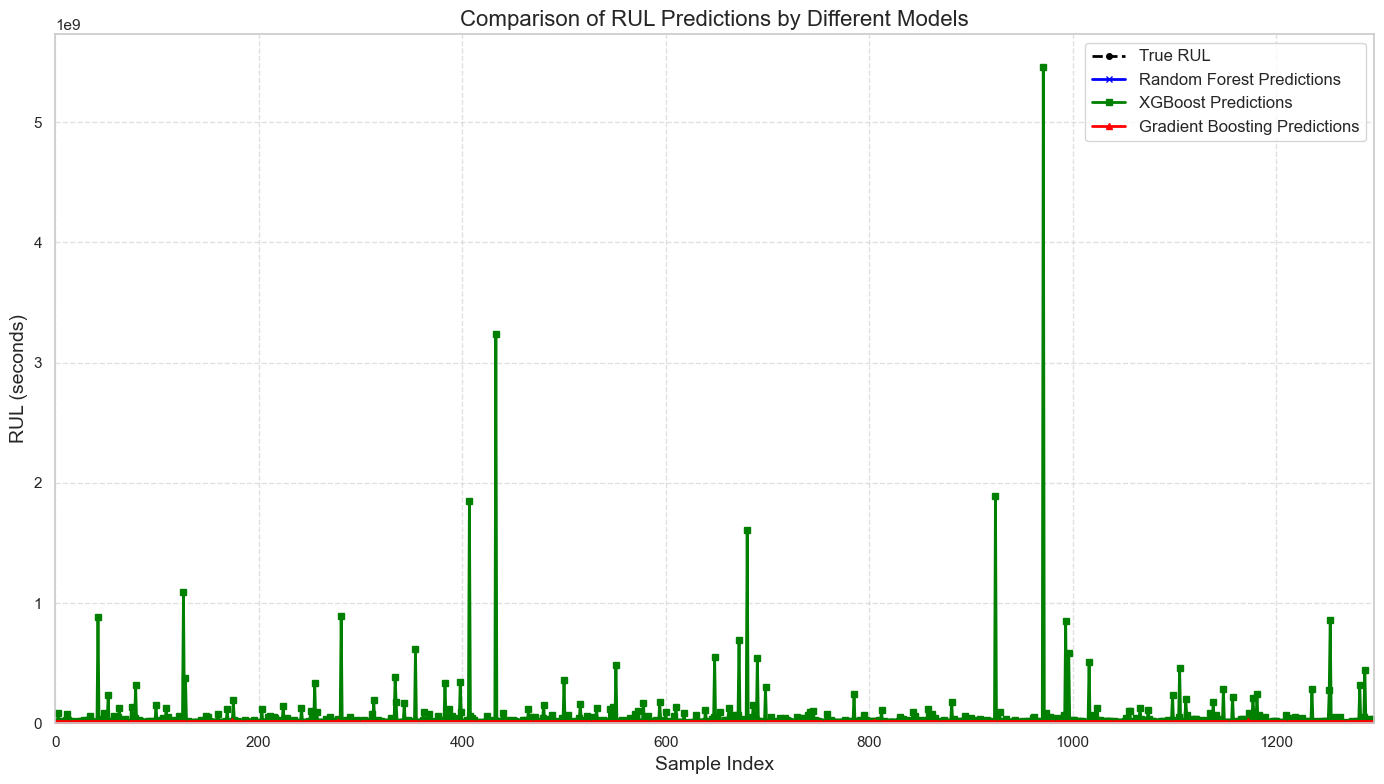

Comparison of Actual and Predicted RUL Values:
           True RUL  Random Forest Predicted RUL  XGBoost Predicted RUL  \
3558   48713.235294                 48714.705975              8331548.0   
3903   24178.832117                 24180.603698              7559524.5   
2131   31309.073724                 31309.078199             14012480.0   
351    47052.556818                 47045.907276             85806896.0   
3422   81188.725490                 81188.842547              8709510.0   
3361  115821.678322                115774.094306              8728278.0   
3025   26800.161812                 26798.869952              9779447.0   
1357   29628.801431                 29630.394377             22174196.0   
3720   32993.027888                 32998.317184              7850032.5   
2259   25209.284627                 25209.670083             13266614.0   

      Gradient Boosting Predicted RUL  
3558                     47182.199300  
3903                     24298.006546  
2131   

In [387]:
import matplotlib.pyplot as plt

# Define distinct colors for each model
colors = ["blue", "green", "red"]

plt.figure(figsize=(14, 8))

# Plot True RUL with a black dashed line
plt.plot(y_test.values, label="True RUL", color="black", linestyle="--", linewidth=2, marker='o', markersize=4)

# Plot predictions with different colors and markers
plt.plot(rf_y_pred, label="Random Forest Predictions", color=colors[0], linestyle="-", linewidth=2, marker='x', markersize=4)
plt.plot(xgb_y_pred, label="XGBoost Predictions", color=colors[1], linestyle="-", linewidth=2, marker='s', markersize=4)
plt.plot(gbr_y_pred, label="Gradient Boosting Predictions", color=colors[2], linestyle="-", linewidth=2, marker='^', markersize=4)

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Comparison of RUL Predictions by Different Models", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("RUL (seconds)", fontsize=14)

# Add legend
plt.legend(fontsize=12, loc="upper right")

# Adjust x and y axis limits for better clarity
plt.ylim(bottom=0)  # Ensure RUL starts from 0
plt.xlim(0, len(y_test))  # Fit the x-axis to the sample range

# Show plot
plt.tight_layout()
plt.show()


# Create a DataFrame to store the comparison
comparison_df = pd.DataFrame({
    'True RUL': y_test,
    'Random Forest Predicted RUL': rf_y_pred,
    'XGBoost Predicted RUL': xgb_y_pred,
    'Gradient Boosting Predicted RUL': gbr_y_pred
})

# Display the first 10 rows of the comparison table
print("Comparison of Actual and Predicted RUL Values:")
print(comparison_df.head(10))

# Optional: Save the comparison table to a CSV file for documentation
comparison_df.to_csv('model_rul_comparison.csv', index=False)


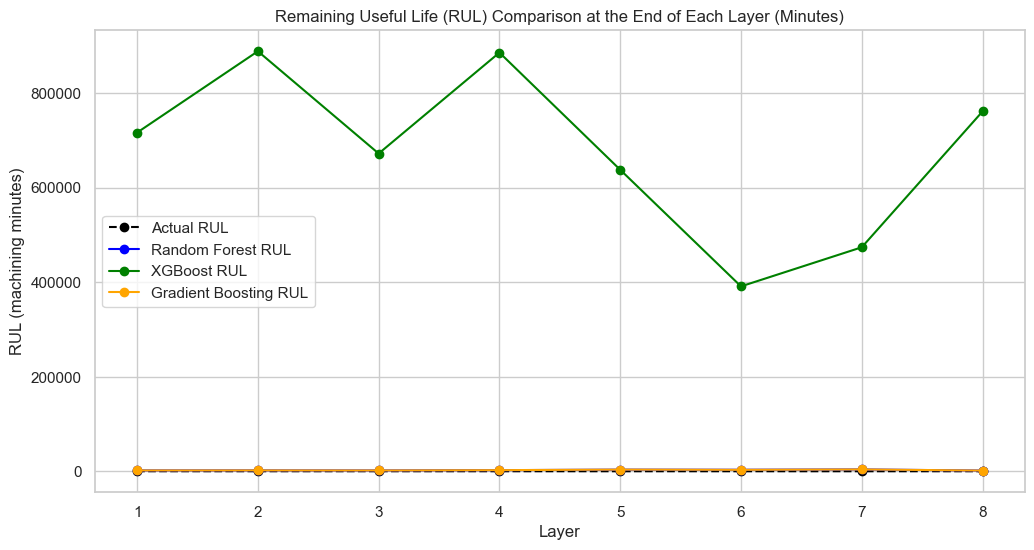

In [390]:
import matplotlib.pyplot as plt

# Group by layer to calculate RUL at the end of each layer for each model
layer_end_rul_actual = features_df.groupby('Layer').last()['RUL (seconds)'] / 60  # Convert to minutes
layer_end_rul_rf = rf_y_pred.reshape(-1, len(layer_end_rul_actual)).mean(axis=0) / 60  # Predicted RF RUL (convert to minutes)
layer_end_rul_xgb = xgb_y_pred.reshape(-1, len(layer_end_rul_actual)).mean(axis=0) / 60  # Predicted XGBoost RUL (convert to minutes)
layer_end_rul_gbr = gbr_y_pred.reshape(-1, len(layer_end_rul_actual)).mean(axis=0) / 60  # Predicted GBR RUL (convert to minutes)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(layer_end_rul_actual.index, layer_end_rul_actual, marker='o', label='Actual RUL', color='black', linestyle='dashed')
plt.plot(layer_end_rul_actual.index, layer_end_rul_rf, marker='o', label='Random Forest RUL', color='blue')
plt.plot(layer_end_rul_actual.index, layer_end_rul_xgb, marker='o', label='XGBoost RUL', color='green')
plt.plot(layer_end_rul_actual.index, layer_end_rul_gbr, marker='o', label='Gradient Boosting RUL', color='orange')

# Customize plot
plt.title("Remaining Useful Life (RUL) Comparison at the End of Each Layer (Minutes)")
plt.xlabel("Layer")
plt.ylabel("RUL (machining minutes)")
plt.grid(True)
plt.legend()
plt.show()


In [389]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Evaluation metric
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Parallelize computations
)

# Perform Randomized Search
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MSE):", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.1388888888888889}
Best Score (Negative MSE): -4818861.843614296
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   8.7s
[CV] END learning_rate=0.1388888888888889, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   5.2s
[CV] END learning_rate=0.1388888888888889, max_depth=6, min_samples_leaf=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   6.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=20, n_estimators=50, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.106666

Final Tuned Gradient Boosting Regressor Evaluation Metrics:
Mean Squared Error (MSE): 213678.9964
Mean Absolute Error (MAE): 276.3981
R² Score: 1.0000


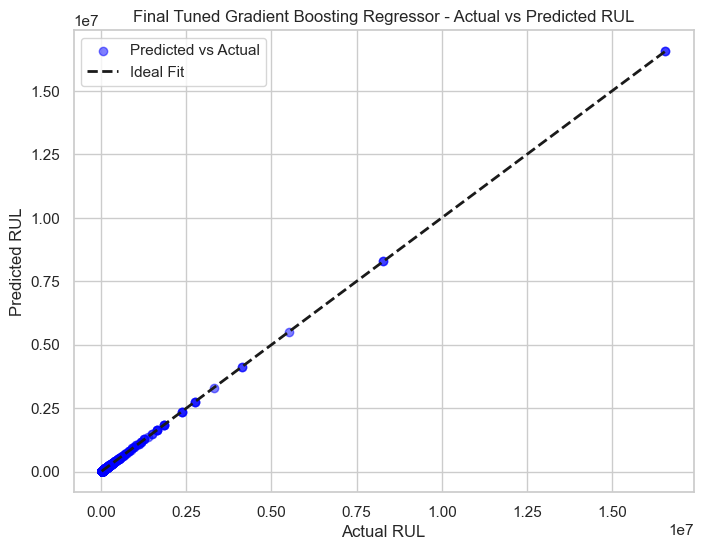

In [391]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Train the final Gradient Boosting Regressor with the best parameters
final_model = GradientBoostingRegressor(
    subsample=0.8,
    n_estimators=500,
    min_samples_split=20,
    min_samples_leaf=1,
    max_depth=6,
    learning_rate=0.1388888888888889,
    random_state=42
)

# Train the model
final_model.fit(X_train, y_train)

# Step 2: Predict RUL on the test set
final_y_pred = final_model.predict(X_test)

# Step 3: Evaluate the final model
final_mse = mean_squared_error(y_test, final_y_pred)
final_mae = mean_absolute_error(y_test, final_y_pred)
final_r2 = r2_score(y_test, final_y_pred)

# Display evaluation metrics
print("Final Tuned Gradient Boosting Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {final_mse:.4f}")
print(f"Mean Absolute Error (MAE): {final_mae:.4f}")
print(f"R² Score: {final_r2:.4f}")

# Optional: Visualize actual vs. predicted RUL
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_y_pred, alpha=0.5, label="Predicted vs Actual", color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Final Tuned Gradient Boosting Regressor - Actual vs Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()


Comparison of Actual and Predicted RUL (Top 20 Rows):
         Actual RUL  Predicted RUL
3558   48713.235294   48776.501576
3903   24178.832117   24184.464759
2131   31309.073724   31392.083448
351    47052.556818   47129.707447
3422   81188.725490   81125.711916
3361  115821.678322  114256.021273
3025   26800.161812   26695.920198
1357   29628.801431   29664.151723
3720   32993.027888   33321.856776
2259   25209.284627   25298.293829
3693   34868.421053   34724.232876
1047   66516.064257   66184.401519
381    43357.329843   43294.056144
957   104166.666667  104180.760205
5394   29735.188510   29846.087719
4054  552083.333333  550097.130879
1600   20651.496259   20657.422860
4190   99774.096386  100097.929011
3434   76678.240741   76309.413736
5335   33258.032129   33455.175757


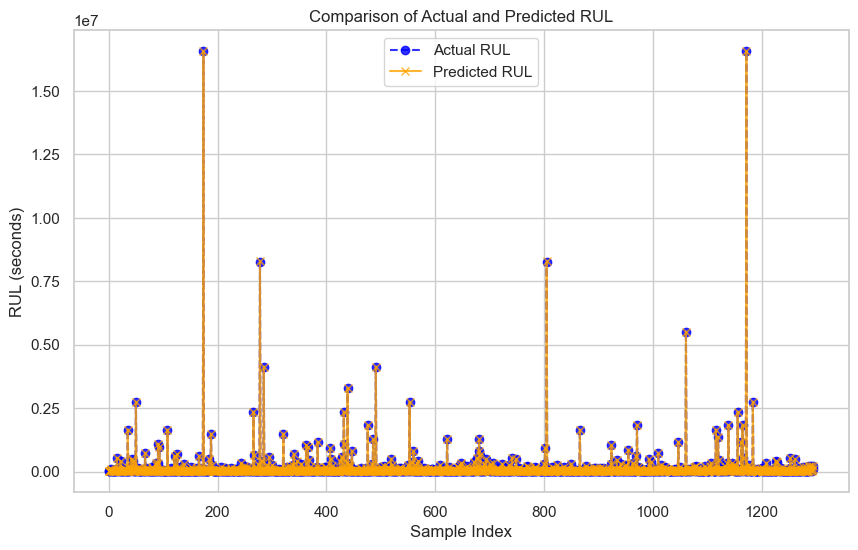

In [392]:
import pandas as pd

# Step 4: Create a DataFrame to compare actual and predicted RUL
rul_comparison_df = pd.DataFrame({
    'Actual RUL': y_test,
    'Predicted RUL': final_y_pred
})

# Display the comparison table (first 20 rows for brevity)
print("Comparison of Actual and Predicted RUL (Top 20 Rows):")
print(rul_comparison_df.head(20))

# Save the DataFrame as a CSV file for further analysis (optional)
rul_comparison_df.to_csv("rul_comparison.csv", index=False)

# Step 5: Plot Actual vs Predicted RUL for each sample
plt.figure(figsize=(10, 6))
plt.plot(rul_comparison_df['Actual RUL'].values, label="Actual RUL", marker='o', color='blue', linestyle='--', alpha=0.8)
plt.plot(rul_comparison_df['Predicted RUL'].values, label="Predicted RUL", marker='x', color='orange', linestyle='-', alpha=0.8)
plt.xlabel("Sample Index")
plt.ylabel("RUL (seconds)")
plt.title("Comparison of Actual and Predicted RUL")
plt.legend()
plt.grid(True)
plt.show()


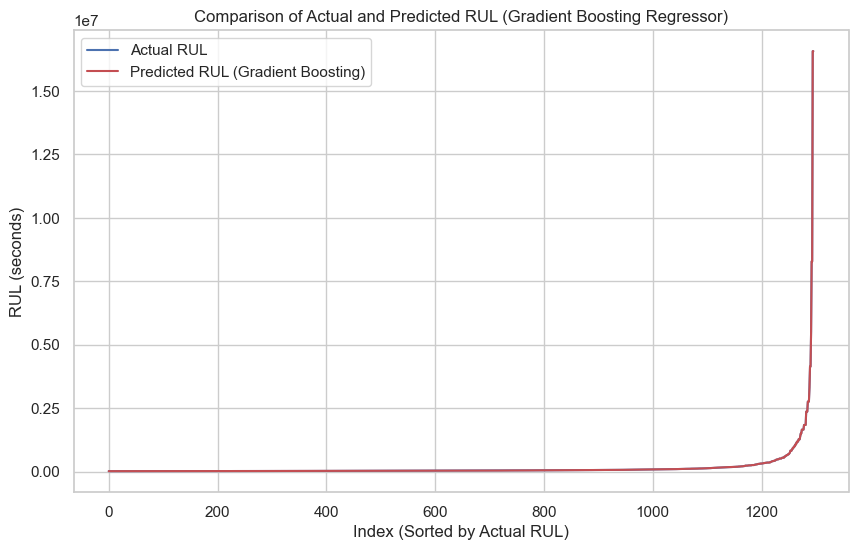

In [393]:
# Optional: Create a DataFrame for actual and predicted RUL
rul_comparison = pd.DataFrame({
    'Actual RUL': y_test,
    'Predicted RUL': final_y_pred
}).reset_index(drop=True)

# Step 1: Sort the DataFrame by actual RUL for a smooth curve comparison
rul_comparison = rul_comparison.sort_values(by='Actual RUL').reset_index(drop=True)

# Step 2: Plot the curves for actual and predicted RUL
plt.figure(figsize=(10, 6))

plt.plot(rul_comparison.index, rul_comparison['Actual RUL'], 'b-', label='Actual RUL')
plt.plot(rul_comparison.index, rul_comparison['Predicted RUL'], 'r-', label='Predicted RUL (Gradient Boosting)')
plt.xlabel("Index (Sorted by Actual RUL)")
plt.ylabel("RUL (seconds)")
plt.title("Comparison of Actual and Predicted RUL (Gradient Boosting Regressor)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


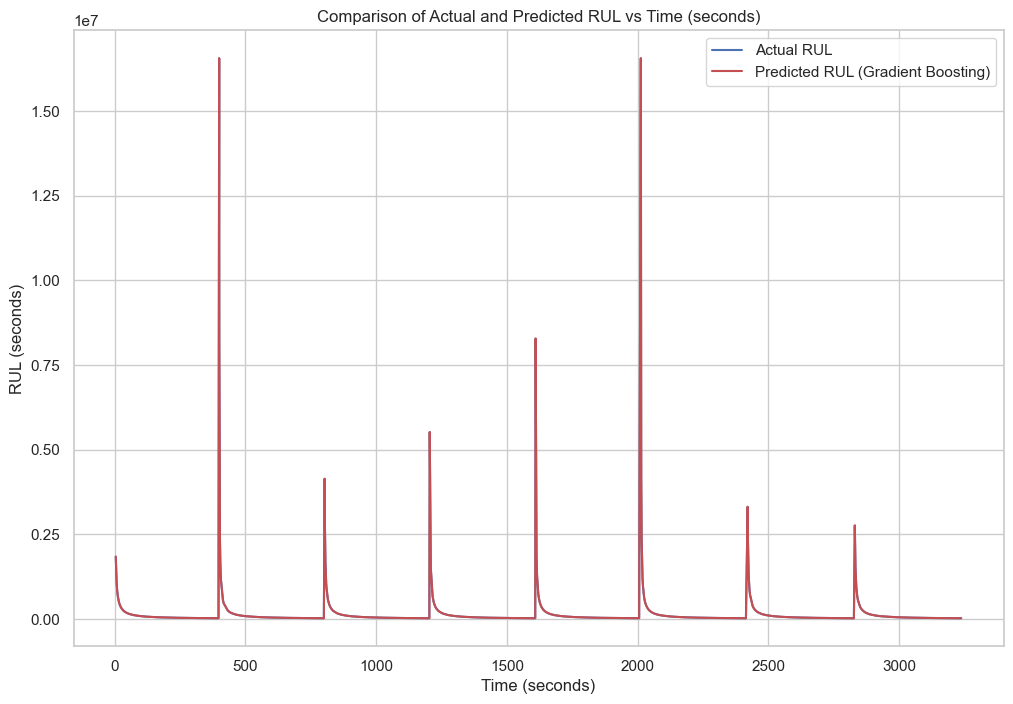

In [394]:
# Optional: Choose two key features that influence RUL
x_feature = 'Time (seconds)'  # Feature for the x-axis
y_feature = 'Wear Volume'     # Feature for the y-axis

# Create a DataFrame for plotting
rul_comparison_with_features = pd.DataFrame({
    x_feature: X_test[x_feature],
    y_feature: X_test[y_feature],
    'Actual RUL': y_test,
    'Predicted RUL': final_y_pred
})

# Sort the DataFrame by the chosen x-axis feature for smoother visualization
rul_comparison_with_features = rul_comparison_with_features.sort_values(by=x_feature)

# Plot the comparison
plt.figure(figsize=(12, 8))

# Plot actual RUL
plt.plot(
    rul_comparison_with_features[x_feature],
    rul_comparison_with_features['Actual RUL'],
    'b-', label='Actual RUL'
)

# Plot predicted RUL
plt.plot(
    rul_comparison_with_features[x_feature],
    rul_comparison_with_features['Predicted RUL'],
    'r-', label='Predicted RUL (Gradient Boosting)'
)

# Customize the plot
plt.xlabel(x_feature)
plt.ylabel("RUL (seconds)")
plt.title(f"Comparison of Actual and Predicted RUL vs {x_feature}")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [395]:
print(features_df[['Layer', 'RUL (machining minutes)']].groupby('Layer').last())


       RUL (machining minutes)
Layer                         
1                   345.483938
2                   343.335406
3                   342.908903
4                   340.371969
5                   342.483457
6                   339.534645
7                   337.047212
8                   335.409072


       RUL (seconds)  RUL (minutes)  Normalized RUL (minutes)
Layer                                                        
1        2075.492920      34.591549                  1.000000
2        1033.855587      17.230926                  0.427630
3         688.088883      11.468148                  0.237635
4         514.674700       8.577912                  0.142345
5         411.584609       6.859743                  0.085698
6         342.404319       5.706739                  0.047684
7         292.822289       4.880371                  0.020439
8         255.625252       4.260421                  0.000000


/var/folders/7v/lnfktm154n35dh4q070jjrz40000gq/T/ipykernel_46192/2619876641.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--o" (-> color='k'). The keyword argument will take precedence.
  plt.plot(layer_end_rul_actual.index, layer_end_rul_actual['Normalized RUL (minutes)'], 'k--o', label='Normalized Actual RUL', color='black')


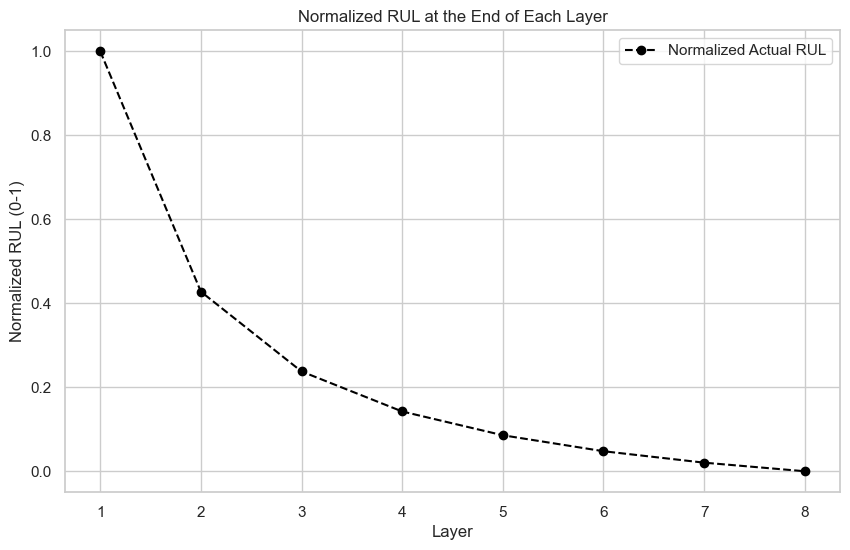

In [273]:
from sklearn.preprocessing import MinMaxScaler

# Ensure 'RUL (seconds)' column exists
if 'RUL (seconds)' not in layer_end_rul_actual.columns:
    raise ValueError("The column 'RUL (seconds)' is missing. Ensure it exists before normalization.")

# Convert RUL from seconds to minutes
layer_end_rul_actual['RUL (minutes)'] = layer_end_rul_actual['RUL (seconds)'] / 60

# Normalize the 'RUL (minutes)' column
scaler = MinMaxScaler()
layer_end_rul_actual['Normalized RUL (minutes)'] = scaler.fit_transform(layer_end_rul_actual[['RUL (minutes)']])

# Optional: Display the updated DataFrame
print(layer_end_rul_actual)

# Plot normalized RUL
plt.figure(figsize=(10, 6))
plt.plot(layer_end_rul_actual.index, layer_end_rul_actual['Normalized RUL (minutes)'], 'k--o', label='Normalized Actual RUL', color='black')
plt.title("Normalized RUL at the End of Each Layer")
plt.xlabel("Layer")
plt.ylabel("Normalized RUL (0-1)")
plt.legend()
plt.grid(True)
plt.show()


In [274]:
# Ensure the required columns exist
if 'Segmentation' not in features_df.columns or 'Layer' not in features_df.columns:
    raise ValueError("The necessary columns ('Segmentation', 'Layer') are missing from the data.")

# Calculate total machining time for each layer
time_per_row = 0.5  # seconds
machining_time_per_layer = (
    features_df[features_df['Segmentation'] == 1]
    .groupby('Layer')
    .size() * time_per_row
)

# Total machining time across all layers
total_machining_time = machining_time_per_layer.sum()

# Display the machining time
print("Machining Time (seconds) per Layer:")
print(machining_time_per_layer)
print(f"\nTotal Machining Time (seconds): {total_machining_time}")
print(f"Total Machining Time (minutes): {total_machining_time / 60}")


Machining Time (seconds) per Layer:
Layer
1    399.5
2    402.0
3    402.5
4    405.5
5    403.0
6    406.5
7    409.5
8    411.5
dtype: float64

Total Machining Time (seconds): 3240.0
Total Machining Time (minutes): 54.0
